In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten, SimpleRNN, LSTM, GRU, Bidirectional 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/drive/MyDrive/alexa_reviews.csv")

In [3]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [4]:
from wordcloud import WordCloud

In [5]:
positive_review = ' '.join(df[df["feedback"] == 1]["verified_reviews"])
negative_review = ' '.join(df[df["feedback"] == 0]["verified_reviews"])

##Positive review

In [6]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

In [7]:
wc.generate(positive_review)

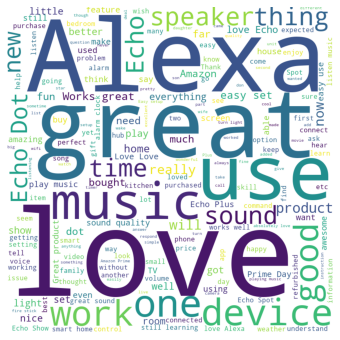

In [8]:
plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

##Negative review

In [9]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

In [10]:
wc.generate(negative_review)

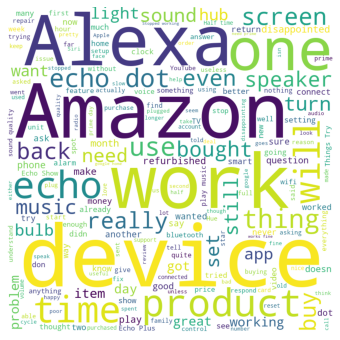

In [11]:
plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [12]:
# Feature and Target
X = df["verified_reviews"]
y = df["feedback"]

In [13]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [14]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [15]:
# vocabulary
tokenizer.index_word

{1: 'the',
 2: 'i',
 3: 'to',
 4: 'it',
 5: 'and',
 6: 'a',
 7: 'my',
 8: 'is',
 9: 'for',
 10: 'love',
 11: 'echo',
 12: 'this',
 13: 'with',
 14: 'have',
 15: 'of',
 16: 'great',
 17: 'in',
 18: 'that',
 19: 'on',
 20: 'but',
 21: 'alexa',
 22: 'so',
 23: 'you',
 24: 'music',
 25: 'as',
 26: 'not',
 27: 'use',
 28: 'like',
 29: 'up',
 30: 'can',
 31: 'was',
 32: 'we',
 33: 'works',
 34: 'be',
 35: 'all',
 36: 'very',
 37: 'easy',
 38: 'just',
 39: 'sound',
 40: 'set',
 41: 'more',
 42: 'one',
 43: 'good',
 44: 'me',
 45: 'do',
 46: 'are',
 47: 'when',
 48: 'dot',
 49: 'product',
 50: 'an',
 51: 'or',
 52: 'amazon',
 53: 'if',
 54: 'get',
 55: 'speaker',
 56: 'device',
 57: 'has',
 58: 'home',
 59: '34',
 60: "it's",
 61: 'still',
 62: 'had',
 63: 'from',
 64: 'play',
 65: 'really',
 66: 'at',
 67: 'she',
 68: 'will',
 69: 'would',
 70: 'prime',
 71: 'am',
 72: 'what',
 73: 'other',
 74: 'our',
 75: 'time',
 76: 'out',
 77: 'also',
 78: 'smart',
 79: 'than',
 80: 'no',
 81: 'much',
 8

In [16]:
vocab_len = len(tokenizer.index_word)
vocab_len

3632

In [17]:
# text to sequence
train_sequence = tokenizer.texts_to_sequences(X_train)

In [18]:
doc_len = []

for doc in train_sequence:
  doc_len.append(len(doc))

In [19]:
max(doc_len)

555

In [20]:
np.quantile(doc_len, 0.99)

151.96000000000004

In [21]:
max_length = 45

In [22]:
# padding
train_matrix = sequence.pad_sequences(train_sequence,max_length)
train_matrix

array([[   0,    0,    0, ..., 1234,   19,   44],
       [   0,    0,    0, ...,  765,    6, 1521],
       [   0,    0,    0, ...,    4,   30,   45],
       ...,
       [   0,    0,    0, ...,  315,   16,   49],
       [   0,    0,    0, ...,    0,  525,  570],
       [   0,    0,    0, ...,    1,   11,  141]], dtype=int32)

In [23]:
# test data
test_sequence = tokenizer.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,max_length)
test_matrix

array([[  0,   0,   0, ..., 655,  67,   8],
       [319,  51, 487, ...,   4,  50, 976],
       [219,  13,   7, ...,   7, 611, 134],
       ...,
       [  0,   0,   0, ..., 427,  11,  48],
       [  0,   0,   0, ...,  10,   1,  48],
       [  0,   0,   0, ..., 482,  15,  24]], dtype=int32)

##RNN

In [24]:
model = Sequential()
model.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model.add(SimpleRNN(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [25]:
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(train_matrix,y_train,epochs=10,batch_size=128)

Epoch 1/10
18/18 [==============================] - 5s 72ms/step - loss: 0.4875
Epoch 2/10
18/18 [==============================] - 1s 73ms/step - loss: 0.3207
Epoch 3/10
18/18 [==============================] - 1s 74ms/step - loss: 0.2713
Epoch 4/10
18/18 [==============================] - 1s 74ms/step - loss: 0.2131
Epoch 5/10
18/18 [==============================] - 1s 72ms/step - loss: 0.1263
Epoch 6/10
18/18 [==============================] - 1s 66ms/step - loss: 0.0724
Epoch 7/10
18/18 [==============================] - 1s 69ms/step - loss: 0.0399
Epoch 8/10
18/18 [==============================] - 1s 79ms/step - loss: 0.0243
Epoch 9/10
18/18 [==============================] - 2s 89ms/step - loss: 0.0211
Epoch 10/10
18/18 [==============================] - 1s 73ms/step - loss: 0.0200


In [26]:
y_pred = model.predict(test_matrix)

In [27]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.33      0.36        73
           1       0.94      0.96      0.95       872

    accuracy                           0.91       945
   macro avg       0.67      0.64      0.66       945
weighted avg       0.90      0.91      0.91       945



## Multi-layer RNN

In [29]:
model1 = Sequential()
model1.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model1.add(SimpleRNN(64, return_sequences=True))
model1.add(SimpleRNN(64, return_sequences=True))
model1.add(SimpleRNN(64))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(32, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

In [30]:
model1.compile(optimizer="adam",loss="binary_crossentropy")
model1.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
69/69 [==============================] - 15s 126ms/step - loss: 0.3524
Epoch 2/10
69/69 [==============================] - 9s 124ms/step - loss: 0.2639
Epoch 3/10
69/69 [==============================] - 5s 69ms/step - loss: 0.1489
Epoch 4/10
69/69 [==============================] - 4s 61ms/step - loss: 0.0401
Epoch 5/10
69/69 [==============================] - 4s 61ms/step - loss: 0.0283
Epoch 6/10
69/69 [==============================] - 4s 61ms/step - loss: 0.0201
Epoch 7/10
69/69 [==============================] - 4s 62ms/step - loss: 0.0187
Epoch 8/10
69/69 [==============================] - 4s 61ms/step - loss: 0.0185
Epoch 9/10
69/69 [==============================] - 4s 61ms/step - loss: 0.0184
Epoch 10/10
69/69 [==============================] - 4s 61ms/step - loss: 0.0183


In [31]:
y_pred = model1.predict(test_matrix)

In [32]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40        73
           1       0.95      0.97      0.96       872

    accuracy                           0.92       945
   macro avg       0.72      0.65      0.68       945
weighted avg       0.91      0.92      0.92       945



##Bidirectional RNN

In [34]:
model2 = Sequential()
model2.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model2.add(Bidirectional(SimpleRNN(64)))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(32, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

In [35]:
model2.compile(optimizer="adam",loss="binary_crossentropy")
model2.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
69/69 [==============================] - 5s 42ms/step - loss: 0.3568
Epoch 2/10
69/69 [==============================] - 3s 42ms/step - loss: 0.2396
Epoch 3/10
69/69 [==============================] - 3s 41ms/step - loss: 0.1197
Epoch 4/10
69/69 [==============================] - 3s 41ms/step - loss: 0.0364
Epoch 5/10
69/69 [==============================] - 3s 41ms/step - loss: 0.0206
Epoch 6/10
69/69 [==============================] - 3s 42ms/step - loss: 0.0186
Epoch 7/10
69/69 [==============================] - 3s 41ms/step - loss: 0.0184
Epoch 8/10
69/69 [==============================] - 3s 41ms/step - loss: 0.0183
Epoch 9/10
69/69 [==============================] - 3s 41ms/step - loss: 0.0182
Epoch 10/10
69/69 [==============================] - 3s 42ms/step - loss: 0.0182


In [36]:
y_pred = model2.predict(test_matrix)

In [37]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.36      0.46        73
           1       0.95      0.99      0.97       872

    accuracy                           0.94       945
   macro avg       0.81      0.67      0.72       945
weighted avg       0.93      0.94      0.93       945



##LSTM

In [39]:
model3 = Sequential()
model3.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model3.add(LSTM(64))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(32, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

In [40]:
model3.compile(optimizer="adam",loss="binary_crossentropy")
model3.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
69/69 [==============================] - 7s 44ms/step - loss: 0.4285
Epoch 2/10
69/69 [==============================] - 3s 44ms/step - loss: 0.2145
Epoch 3/10
69/69 [==============================] - 3s 44ms/step - loss: 0.1189
Epoch 4/10
69/69 [==============================] - 4s 59ms/step - loss: 0.0625
Epoch 5/10
69/69 [==============================] - 3s 44ms/step - loss: 0.0448
Epoch 6/10
69/69 [==============================] - 3s 45ms/step - loss: 0.0359
Epoch 7/10
69/69 [==============================] - 3s 44ms/step - loss: 0.0243
Epoch 8/10
69/69 [==============================] - 3s 44ms/step - loss: 0.0193
Epoch 9/10
69/69 [==============================] - 3s 44ms/step - loss: 0.0187
Epoch 10/10
69/69 [==============================] - 3s 44ms/step - loss: 0.0185


In [41]:
y_pred = model3.predict(test_matrix)

In [42]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.53        73
           1       0.95      0.99      0.97       872

    accuracy                           0.94       945
   macro avg       0.83      0.70      0.75       945
weighted avg       0.93      0.94      0.94       945



#Multidimentional LSTM

In [44]:
model4 = Sequential()
model4.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model4.add(LSTM(64, return_sequences=True))
model4.add(LSTM(64, return_sequences=True))
model4.add(LSTM(64))
model4.add(Dense(64, activation="relu"))
model4.add(Dense(32, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

In [45]:
model4.compile(optimizer="adam",loss="binary_crossentropy")
model4.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
69/69 [==============================] - 20s 120ms/step - loss: 0.4011
Epoch 2/10
69/69 [==============================] - 8s 119ms/step - loss: 0.2831
Epoch 3/10
69/69 [==============================] - 8s 118ms/step - loss: 0.2612
Epoch 4/10
69/69 [==============================] - 8s 118ms/step - loss: 0.2480
Epoch 5/10
69/69 [==============================] - 8s 118ms/step - loss: 0.2162
Epoch 6/10
69/69 [==============================] - 8s 120ms/step - loss: 0.1644
Epoch 7/10
69/69 [==============================] - 8s 120ms/step - loss: 0.1038
Epoch 8/10
69/69 [==============================] - 8s 119ms/step - loss: 0.0684
Epoch 9/10
69/69 [==============================] - 9s 134ms/step - loss: 0.0706
Epoch 10/10
69/69 [==============================] - 8s 120ms/step - loss: 0.0463


In [46]:
y_pred = model4.predict(test_matrix)

In [47]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52        73
           1       0.96      0.96      0.96       872

    accuracy                           0.93       945
   macro avg       0.74      0.74      0.74       945
weighted avg       0.93      0.93      0.93       945



##Bidirectional LSTM

In [49]:
model5 = Sequential()
model5.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model5.add(Bidirectional(LSTM(64)))
model5.add(Dense(64, activation="relu"))
model5.add(Dense(32, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

In [50]:
model5.compile(optimizer="adam",loss="binary_crossentropy")
model5.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
69/69 [==============================] - 13s 74ms/step - loss: 0.3515
Epoch 2/10
69/69 [==============================] - 5s 74ms/step - loss: 0.1511
Epoch 3/10
69/69 [==============================] - 5s 74ms/step - loss: 0.0674
Epoch 4/10
69/69 [==============================] - 5s 74ms/step - loss: 0.0291
Epoch 5/10
69/69 [==============================] - 5s 73ms/step - loss: 0.0200
Epoch 6/10
69/69 [==============================] - 5s 74ms/step - loss: 0.0188
Epoch 7/10
69/69 [==============================] - 5s 74ms/step - loss: 0.0186
Epoch 8/10
69/69 [==============================] - 5s 74ms/step - loss: 0.0184
Epoch 9/10
69/69 [==============================] - 5s 74ms/step - loss: 0.0185
Epoch 10/10
69/69 [==============================] - 5s 74ms/step - loss: 0.0183


In [51]:
y_pred = model5.predict(test_matrix)

In [52]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        73
           1       0.96      0.99      0.98       872

    accuracy                           0.95       945
   macro avg       0.88      0.76      0.80       945
weighted avg       0.95      0.95      0.95       945



##GRU

In [54]:
model6 = Sequential()
model6.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model6.add(GRU(64))
model6.add(Dense(64, activation="relu"))
model6.add(Dense(32, activation="relu"))
model6.add(Dense(1, activation="sigmoid"))

In [55]:
model6.compile(optimizer="adam",loss="binary_crossentropy")
model6.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
69/69 [==============================] - 7s 40ms/step - loss: 0.3767
Epoch 2/10
69/69 [==============================] - 3s 40ms/step - loss: 0.2015
Epoch 3/10
69/69 [==============================] - 3s 40ms/step - loss: 0.1228
Epoch 4/10
69/69 [==============================] - 3s 40ms/step - loss: 0.0668
Epoch 5/10
69/69 [==============================] - 3s 40ms/step - loss: 0.0379
Epoch 6/10
69/69 [==============================] - 3s 40ms/step - loss: 0.0282
Epoch 7/10
69/69 [==============================] - 3s 40ms/step - loss: 0.0334
Epoch 8/10
69/69 [==============================] - 3s 39ms/step - loss: 0.0199
Epoch 9/10
69/69 [==============================] - 3s 40ms/step - loss: 0.0191
Epoch 10/10
69/69 [==============================] - 3s 40ms/step - loss: 0.0184


In [56]:
y_pred = model6.predict(test_matrix)

In [57]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.47      0.55        73
           1       0.96      0.98      0.97       872

    accuracy                           0.94       945
   macro avg       0.82      0.72      0.76       945
weighted avg       0.94      0.94      0.94       945



##Multidimentional GRU

In [59]:
model7 = Sequential()
model7.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model7.add(GRU(64, return_sequences=True))
model7.add(GRU(64, return_sequences=True))
model7.add(GRU(64))
model7.add(Dense(64, activation="relu"))
model7.add(Dense(32, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))

In [60]:
model7.compile(optimizer="adam",loss="binary_crossentropy")
model7.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
69/69 [==============================] - 19s 108ms/step - loss: 0.3497
Epoch 2/10
69/69 [==============================] - 8s 110ms/step - loss: 0.1814
Epoch 3/10
69/69 [==============================] - 8s 109ms/step - loss: 0.0961
Epoch 4/10
69/69 [==============================] - 7s 107ms/step - loss: 0.0456
Epoch 5/10
69/69 [==============================] - 7s 107ms/step - loss: 0.0413
Epoch 6/10
69/69 [==============================] - 7s 107ms/step - loss: 0.0229
Epoch 7/10
69/69 [==============================] - 7s 107ms/step - loss: 0.0243
Epoch 8/10
69/69 [==============================] - 7s 107ms/step - loss: 0.0224
Epoch 9/10
69/69 [==============================] - 7s 107ms/step - loss: 0.0187
Epoch 10/10
69/69 [==============================] - 7s 106ms/step - loss: 0.0182


In [61]:
y_pred = model7.predict(test_matrix)

In [62]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.45      0.53        73
           1       0.96      0.98      0.97       872

    accuracy                           0.94       945
   macro avg       0.79      0.72      0.75       945
weighted avg       0.93      0.94      0.93       945



##Bidirectional GRU

In [64]:
model8 = Sequential()
model8.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model8.add(Bidirectional(GRU(64)))
model8.add(Dense(64, activation="relu"))
model8.add(Dense(32, activation="relu"))
model8.add(Dense(1, activation="sigmoid"))

In [65]:
model8.compile(optimizer="adam",loss="binary_crossentropy")
model8.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
69/69 [==============================] - 12s 66ms/step - loss: 0.3493
Epoch 2/10
69/69 [==============================] - 5s 66ms/step - loss: 0.1679
Epoch 3/10
69/69 [==============================] - 5s 66ms/step - loss: 0.0673
Epoch 4/10
69/69 [==============================] - 5s 66ms/step - loss: 0.0320
Epoch 5/10
69/69 [==============================] - 4s 65ms/step - loss: 0.0229
Epoch 6/10
69/69 [==============================] - 5s 66ms/step - loss: 0.0226
Epoch 7/10
69/69 [==============================] - 5s 66ms/step - loss: 0.0198
Epoch 8/10
69/69 [==============================] - 5s 66ms/step - loss: 0.0184
Epoch 9/10
69/69 [==============================] - 5s 66ms/step - loss: 0.0182
Epoch 10/10
69/69 [==============================] - 5s 66ms/step - loss: 0.0182


In [66]:
y_pred = model8.predict(test_matrix)

In [67]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51        73
           1       0.95      0.98      0.97       872

    accuracy                           0.94       945
   macro avg       0.81      0.70      0.74       945
weighted avg       0.93      0.94      0.93       945

